<a href="https://colab.research.google.com/github/Shubham-90s/Credit-Risk-Prediction-Model-for-Loan-Applicants/blob/main/Credit%20Risk%20Prediction%20Model%20for%20Loan%20Applicants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Libraries used**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Other's
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.set_option('display.max_columns', 300) #Setting column display limit
plt.style.use('ggplot') #Applying style to graphs

## storing the dataset into dataframe

In [ ]:
df_app=pd.read_csv("/content/drive/MyDrive/application_data.csv")

## Inspecting DataFrames

In [ ]:
df_app.shape

(307511, 122)

In [ ]:
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [ ]:
df_prev=pd.read_csv("/content/drive/MyDrive/previous_application.csv")

In [ ]:
df_prev.shape

(1670214, 37)

In [ ]:
df_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

## Checking columns with different data types.

In [ ]:
df_app.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [ ]:
df_prev.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
df_app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [ ]:
df_prev.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115833    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

## Sorting Percentage of null values in each column in desending order

In [ ]:
(df_app.isnull().sum()/len(df_app)*100).sort_values(ascending = False).head(50)


COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

## List of Columns & null counts where null values are more than 35%

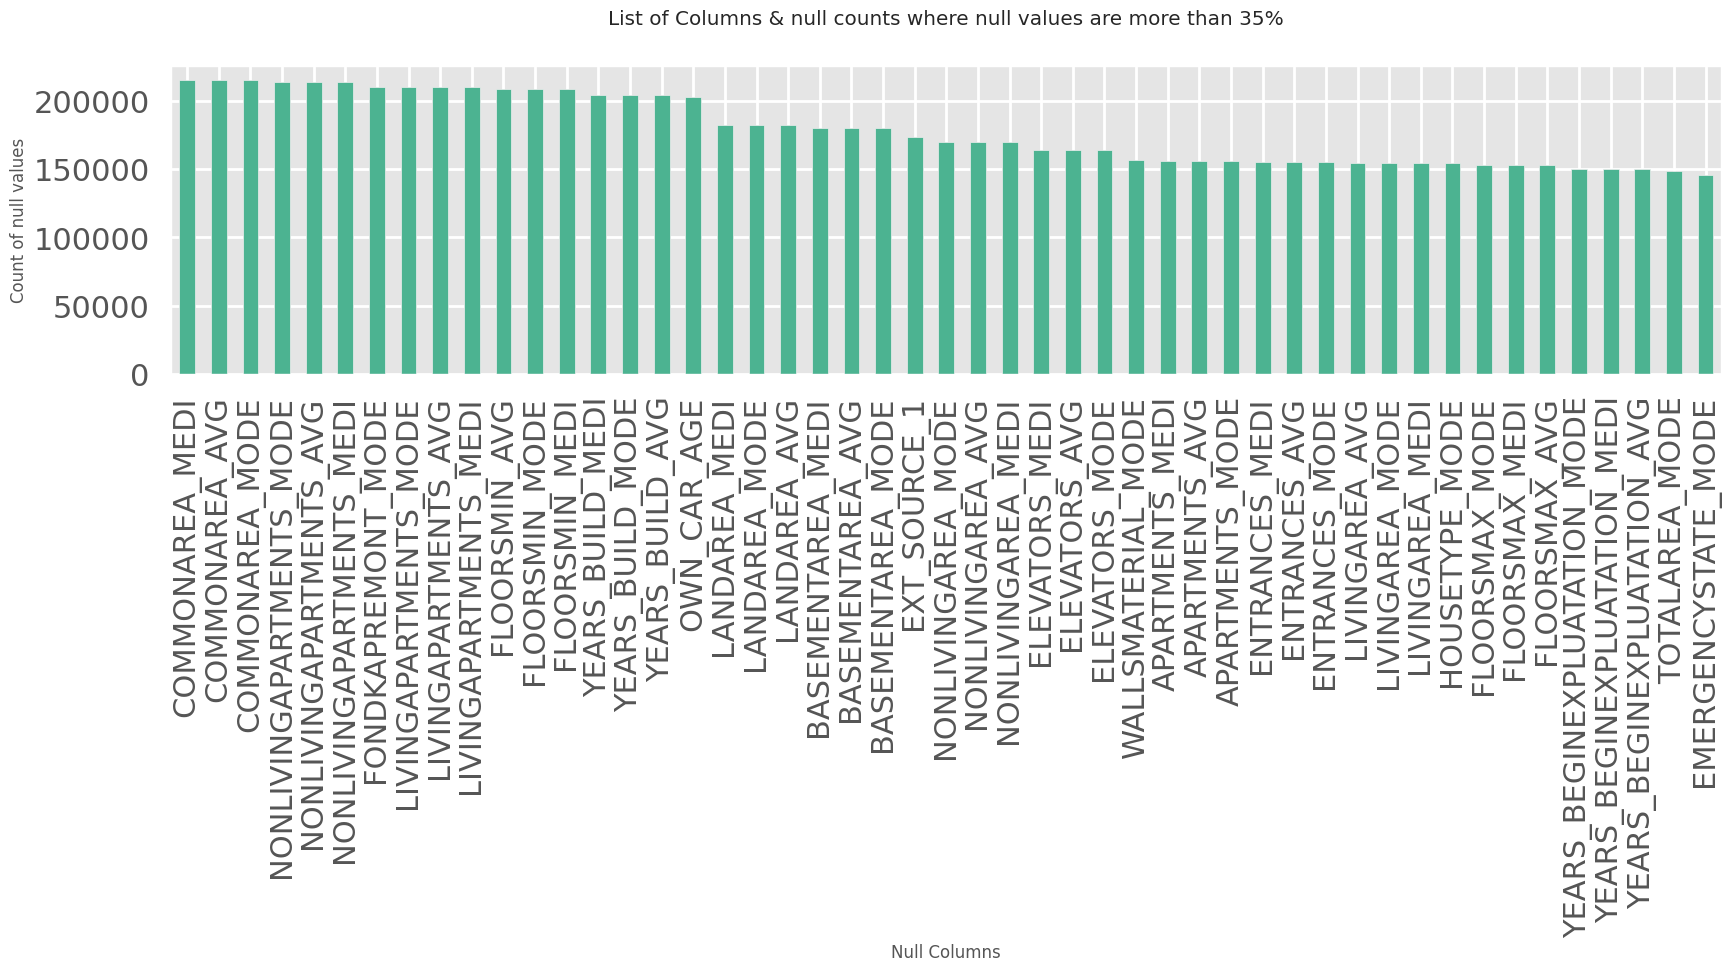

In [ ]:
null_col = df_app.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >(0.35*len(df_app))]


#Plotting Bar Graph for null values greater than 35%

plt.figure(figsize=(20,4))
null_col.plot(kind='bar', color="#4CB391")
plt.title('List of Columns & null counts where null values are more than 35%')

plt.xlabel("Null Columns",fontdict={"fontsize":12,"fontweight":5})                  #Setting X-label and Y-label
plt.ylabel("Count of null values",fontdict={"fontsize":12,"fontweight":5})
plt.show()

## Total no.of columns having percentage of null values > 35%

In [ ]:
len(null_col)

49

## Removing the columns having percentage of null values > 35%

In [ ]:
label = list(null_col.index.values) #Making list of column names having null values greater than 35%
df_app.drop(labels = label,axis=1,inplace = True) #Droping those columns

## Shape of new data frame after removing null values.

In [ ]:
df_app.shape

(307511, 73)

## Checking the % of null values for each column in new dataset again for confirmation

In [ ]:
null = (df_app.isnull().sum()/len(df_app)*100).sort_values(ascending = False).head(50)
null.head(30)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


## Handling Missing Values

### Imputing Columns having null values ≤ 19% with Mode values for numeric columns except for continuous numeric columns we imputed with Median value


In [ ]:
df_app.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df_app.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_YEAR

df_app.AMT_REQ_CREDIT_BUREAU_MON.fillna(df_app.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_MON

df_app.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df_app.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_WEEK

df_app.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df_app.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_DAY

df_app.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df_app.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_HOUR

df_app.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df_app.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_QRT

df_app.NAME_TYPE_SUITE.fillna(df_app.NAME_TYPE_SUITE.mode()[0],inplace = True) #NAME_TYPE_SUITE

df_app.OBS_30_CNT_SOCIAL_CIRCLE.fillna( df_app.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_30_CNT_SOCIAL_CIRCLE

df_app.DEF_30_CNT_SOCIAL_CIRCLE.fillna( df_app.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_30_CNT_SOCIAL_CIRCLE

df_app.OBS_60_CNT_SOCIAL_CIRCLE.fillna( df_app.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_60_CNT_SOCIAL_CIRCLE

df_app.DEF_60_CNT_SOCIAL_CIRCLE.fillna( df_app.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_60_CNT_SOCIAL_CIRCLE

df_app.CNT_FAM_MEMBERS.fillna(df_app.CNT_FAM_MEMBERS.mode() , inplace = True) #CNT_FAM_MEMBERS

df_app.DAYS_LAST_PHONE_CHANGE.fillna(df_app.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace = True) #DAYS_LAST_PHONE_CHANGE

df_app.EXT_SOURCE_2.fillna(df_app.EXT_SOURCE_2.median() , inplace = True) #EXT_SOURCE_2

df_app.EXT_SOURCE_3.fillna(df_app.EXT_SOURCE_3.median() , inplace = True) #EXT_SOURCE_3

## Checking if there are still null values or not

In [ ]:
(df_app.isnull().sum()/len(df_app)*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
FLAG_DOCUMENT_3                 0.000000
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
AMT_REQ_CREDIT_BUREAU_YEAR      0.000000
Length: 73, dtype: float64

## Handling Errors in Data types and Data

In [ ]:
#We can Change the below columns:
#'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE'
#as they have negative and mixed values

df_app[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0            -9461           -637            -3648.0            -2120   
1           -16765          -1188            -1186.0             -291   
2           -19046           -225            -4260.0            -2531   
3           -19005          -3039            -9833.0            -2437   
4           -19932          -3038            -4311.0            -3458   
...            ...            ...                ...              ...   
307506       -9327           -236            -8456.0            -1982   
307507      -20775         365243            -4388.0            -4090   
307508      -14966          -7921            -6737.0            -5150   
307509      -11961          -4786            -2562.0             -931   
307510      -16856          -1262            -5128.0             -410   

        DAYS_LAST_PHONE_CHANGE  
0                      -1134.0  
1                       -828.0  
2                       -815.0  
3                       -617.0  
4                      -1106.0  
...                        ...  
307506                  -273.0  
307507                     0.0  
307508                 -1909.0  
307509                  -322.0  
307510                  -787.0  

[307511 rows x 5 columns]

## Collecting columns starting with 'DAYS' in the list "day_cols"



In [ ]:
day_cols = [i for i in df_app if i.startswith('DAYS')]
day_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

## Applying abs() function to columns starting with 'DAYS' to convert the negative values to positive

In [ ]:
df_app[day_cols]= abs(df_app[day_cols])

In [ ]:
print(df_app['DAYS_BIRTH'].unique())
print(df_app['DAYS_EMPLOYED'].unique())
print(df_app['DAYS_REGISTRATION'].unique())
print(df_app['DAYS_ID_PUBLISH'].unique())
print(df_app['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


In [ ]:
#Changing "Y" and "N" with 1 and 0 for columns

df_app['FLAG_OWN_CAR'] = np.where(df_app['FLAG_OWN_CAR']=='Y', 1 , 0)

df_app['FLAG_OWN_REALTY'] = np.where(df_app['FLAG_OWN_REALTY']=='Y', 1 , 0)

In [ ]:
df_app[['FLAG_OWN_CAR','FLAG_OWN_REALTY']].head()

FLAG_OWN_CAR  FLAG_OWN_REALTY
0             0                1
1             0                0
2             1                1
3             0                1
4             0                1

In [ ]:
#As per below information we can replace the value'XNA' to "F" in the column 'CODE_GENDER" as the most frequent value is F

df_app.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [ ]:
df_app.loc[df_app.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
df_app.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [ ]:
df_app.ORGANIZATION_TYPE.value_counts().head()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: ORGANIZATION_TYPE, dtype: int64

In [ ]:
df_app[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(30)

ORGANIZATION_TYPE      NAME_INCOME_TYPE
0   Business Entity Type 3               Working
1                   School         State servant
2               Government               Working
3   Business Entity Type 3               Working
4                 Religion               Working
5                    Other         State servant
6   Business Entity Type 3  Commercial associate
7                    Other         State servant
8                      XNA             Pensioner
9              Electricity               Working
10                Medicine               Working
11                     XNA             Pensioner
12  Business Entity Type 2               Working
13           Self-employed               Working
14       Transport: type 2               Working
15  Business Entity Type 2               Working
16              Government               Working
17            Construction               Working
18                 Housing               Working
19            Kindergarten         State servant
20           Self-employed               Working
21           Trade: type 7  Commercial associate
22           Self-employed               Working
23                     XNA             Pensioner
24  Business Entity Type 3               Working
25  Business Entity Type 3               Working
26  Business Entity Type 3               Working
27       Industry: type 11               Working
28                Military         State servant
29  Business Entity Type 3               Working

### here we are having null values in business type wherever income type is 'pensioner'.

In [ ]:
df_app.NAME_INCOME_TYPE.value_counts()    #Check the counts for each in NAME_INCOME_TYPE

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [ ]:
#So from these data we can conclude that, Pensioner value is approximately equal to null values in ORGANIZATION_TYPE

In [ ]:
df_app['ORGANIZATION_TYPE'] = df_app['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')
df_app['OCCUPATION_TYPE'].fillna('Pensioner' , inplace = True)

In [ ]:
df_app[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(30)

ORGANIZATION_TYPE      NAME_INCOME_TYPE
0   Business Entity Type 3               Working
1                   School         State servant
2               Government               Working
3   Business Entity Type 3               Working
4                 Religion               Working
5                    Other         State servant
6   Business Entity Type 3  Commercial associate
7                    Other         State servant
8                Pensioner             Pensioner
9              Electricity               Working
10                Medicine               Working
11               Pensioner             Pensioner
12  Business Entity Type 2               Working
13           Self-employed               Working
14       Transport: type 2               Working
15  Business Entity Type 2               Working
16              Government               Working
17            Construction               Working
18                 Housing               Working
19            Kindergarten         State servant
20           Self-employed               Working
21           Trade: type 7  Commercial associate
22           Self-employed               Working
23               Pensioner             Pensioner
24  Business Entity Type 3               Working
25  Business Entity Type 3               Working
26  Business Entity Type 3               Working
27       Industry: type 11               Working
28                Military         State servant
29  Business Entity Type 3               Working

we have replaced XNA values with pensioner.

In [ ]:
#Binning 'AMT_INCOME_TOTAL' to AMT_INCOME_TYPE based on quantiles
df_app['AMT_INCOME_TYPE'] = pd.qcut(df_app.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df_app['AMT_INCOME_TYPE'].head(11)

0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
Name: AMT_INCOME_TYPE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [ ]:
# Binning 'AMT_CREDIT' to 'AMT_CREDIT_TYPE' based on quantiles
df_app['AMT_CREDIT_TYPE'] = pd.qcut(df_app.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df_app['AMT_CREDIT_TYPE'].head(11)

0           LOW
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5           LOW
6     VERY_HIGH
7     VERY_HIGH
8          HIGH
9           LOW
10       MEDIUM
Name: AMT_CREDIT_TYPE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [ ]:
#Binning 'DAYS_BIRTH' column by converting it to years based on various "AGE_GROUP
df_app['DAYS_BIRTH']= (df_app['DAYS_BIRTH']/365).astype(int)    # Converting
df_app['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [ ]:
df_app['AGE_GROUP']=pd.cut(df_app['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])   #Binning

In [ ]:
df_app[['DAYS_BIRTH','AGE_GROUP']].head()

DAYS_BIRTH   AGE_GROUP
0          25  Very_Young
1          45  Middle_Age
2          52  Middle_Age
3          52  Middle_Age
4          54  Middle_Age

In [ ]:
#Dataypes Conversions for better understanding of Variables
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  int64   
 5   FLAG_OWN_REALTY              307511 non-null  int64   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [ ]:
#Found out few catogrical columns are showing dtype as "object" hence changing dtypes of columns from object to "categorical"
df_app['NAME_CONTRACT_TYPE'] = df_app['NAME_CONTRACT_TYPE'].astype('category')
df_app['CODE_GENDER'] = df_app['CODE_GENDER'].astype('category')
df_app['NAME_TYPE_SUITE'] = df_app['NAME_TYPE_SUITE'].astype('category')
df_app['NAME_INCOME_TYPE'] = df_app['NAME_INCOME_TYPE'].astype('category')
df_app['NAME_EDUCATION_TYPE'] = df_app['NAME_EDUCATION_TYPE'].astype('category')
df_app['NAME_FAMILY_STATUS'] = df_app['NAME_FAMILY_STATUS'].astype('category')
df_app['NAME_HOUSING_TYPE'] = df_app['NAME_HOUSING_TYPE'].astype('category')
df_app['OCCUPATION_TYPE'] = df_app['OCCUPATION_TYPE'].astype('category')
df_app['WEEKDAY_APPR_PROCESS_START'] = df_app['WEEKDAY_APPR_PROCESS_START'].astype('category')
df_app['ORGANIZATION_TYPE'] = df_app['ORGANIZATION_TYPE'].astype('category')

In [ ]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  int64   
 5   FLAG_OWN_REALTY              307511 non-null  int64   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [ ]:
#Removing unwanted columns so that will not get confused and our Data looks Clear
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_app.drop(labels=unwanted,axis=1,inplace=True)

In [ ]:
#Checking total no. of Numerical columns after removing unwanted columns
numerical_col = df_app.select_dtypes(include='number').columns
len(numerical_col)

35

ValueError: ignored

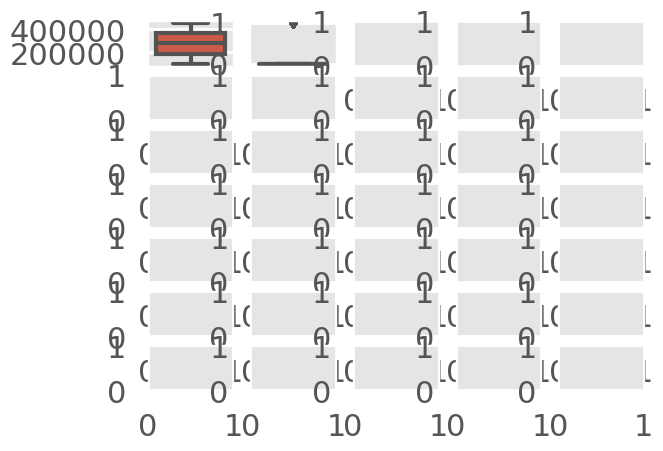

In [ ]:
#Boxplots distribution for each numerical_col using for loop
fig , axes = plt.subplots(nrows=7, ncols=5, constrained_layout=True)                 # Plot Configuration
fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)


for ax, column in zip(axes.flatten(),numerical_col):        #Using For loop

    sns.boxplot(df_app[column],ax=ax)   #Ploting

## Checking Data Imbalance for Target Variable

In [ ]:
Target0 = df_app.loc[df_app["TARGET"]==0]
Target1 = df_app.loc[df_app["TARGET"]==1]

In [ ]:
# Calculating Imbalance percentage
round(len(Target0)/len(Target1),2)

11.39

## Checking data Imbalance by using PIE CHART



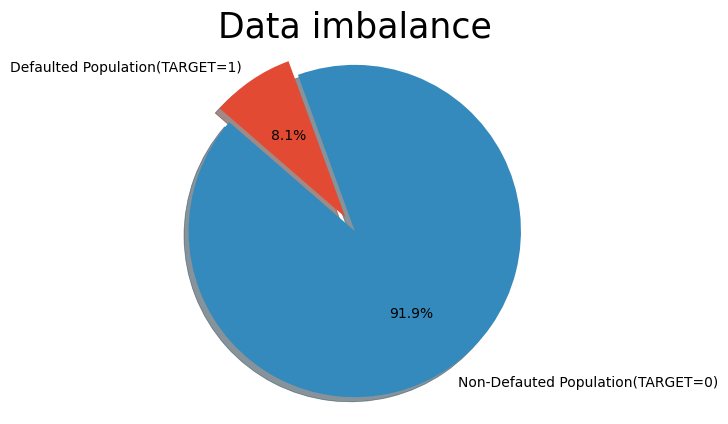

In [ ]:
count1 = 0
count0 = 0
for i in df_app['TARGET'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1

count1 = (count1/len(df_app['TARGET']))*100
count0 = (count0/len(df_app['TARGET']))*100

x = ['Defaulted Population(TARGET=1)','Non-Defauted Population(TARGET=0)']
y = [count1, count0]

explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()

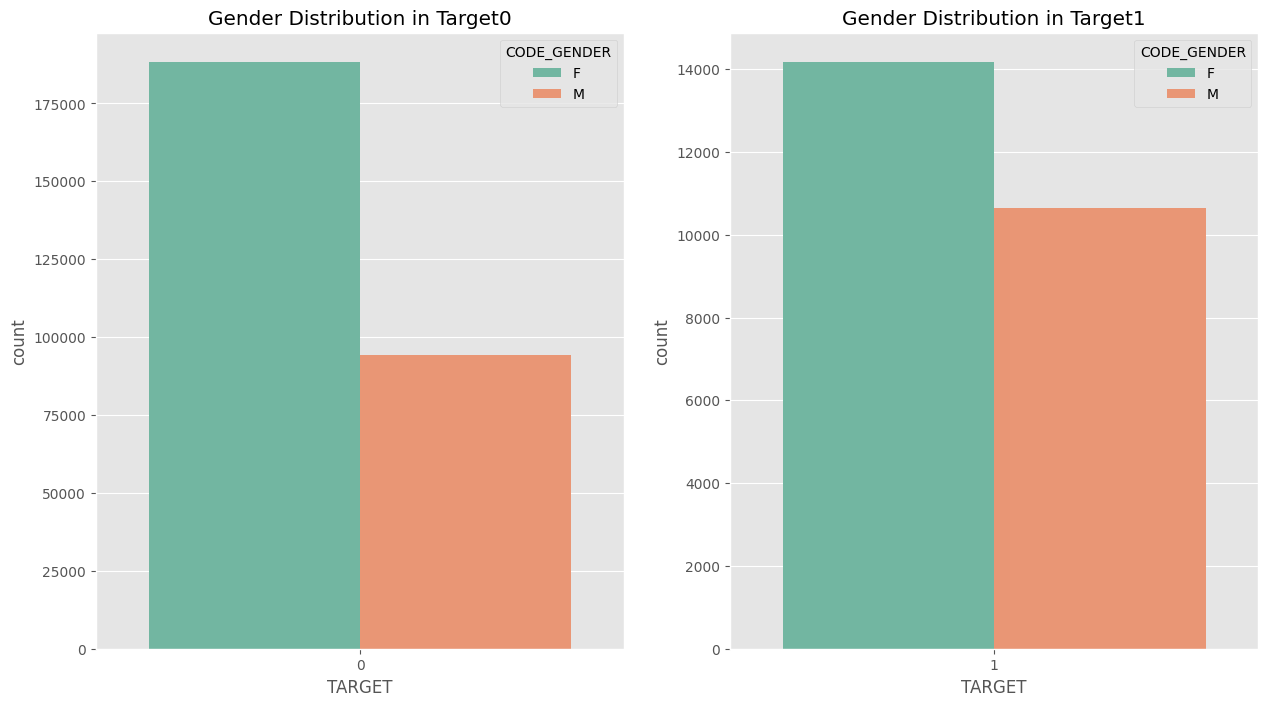

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target0, palette = 'Set2')
plt.title("Gender Distribution in Target0")
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target1, palette = 'Set2')
plt.title("Gender Distribution in Target1")

plt.show()

from above graph we can conclude that female clients applied higher than male clients for loan

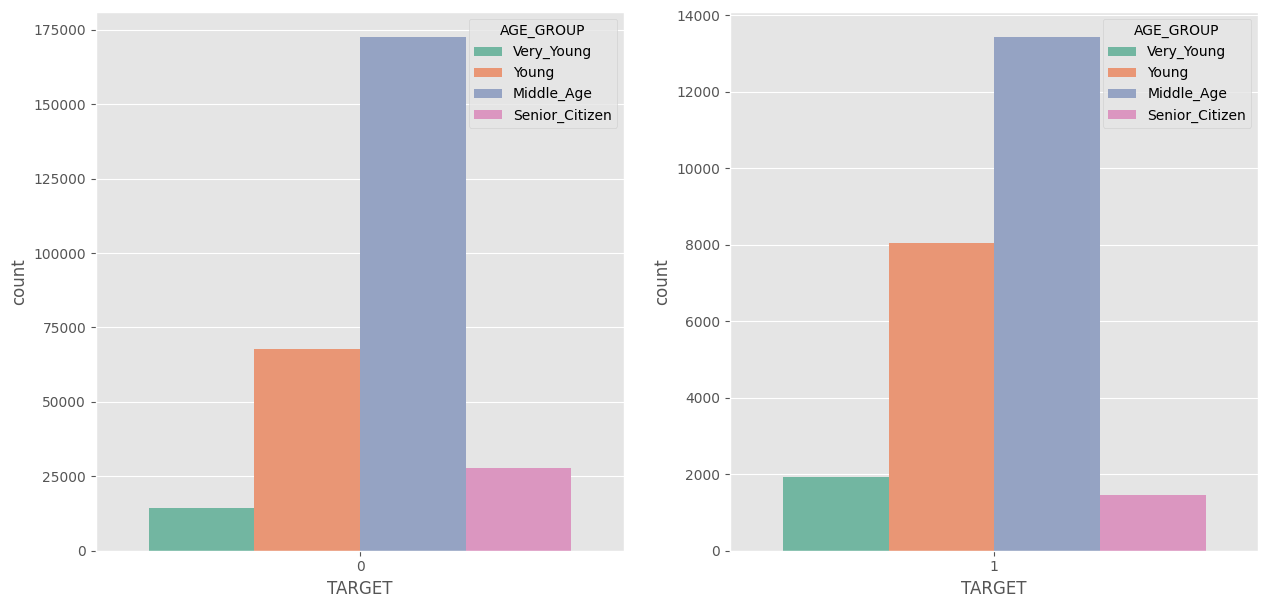

In [ ]:
#AGE Distribution based on Target 0 and Target 1
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target0,palette='Set2')
plt.subplot(122)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target1,palette='Set2')
plt.show()

Middle Age(35-60) group seems to applied higher than any other age group for loan in case of Defaulters as well as Non-defaulters.
Also , Middle Age group facing paying difficulties the most.

<Figure size 4000x500 with 0 Axes>

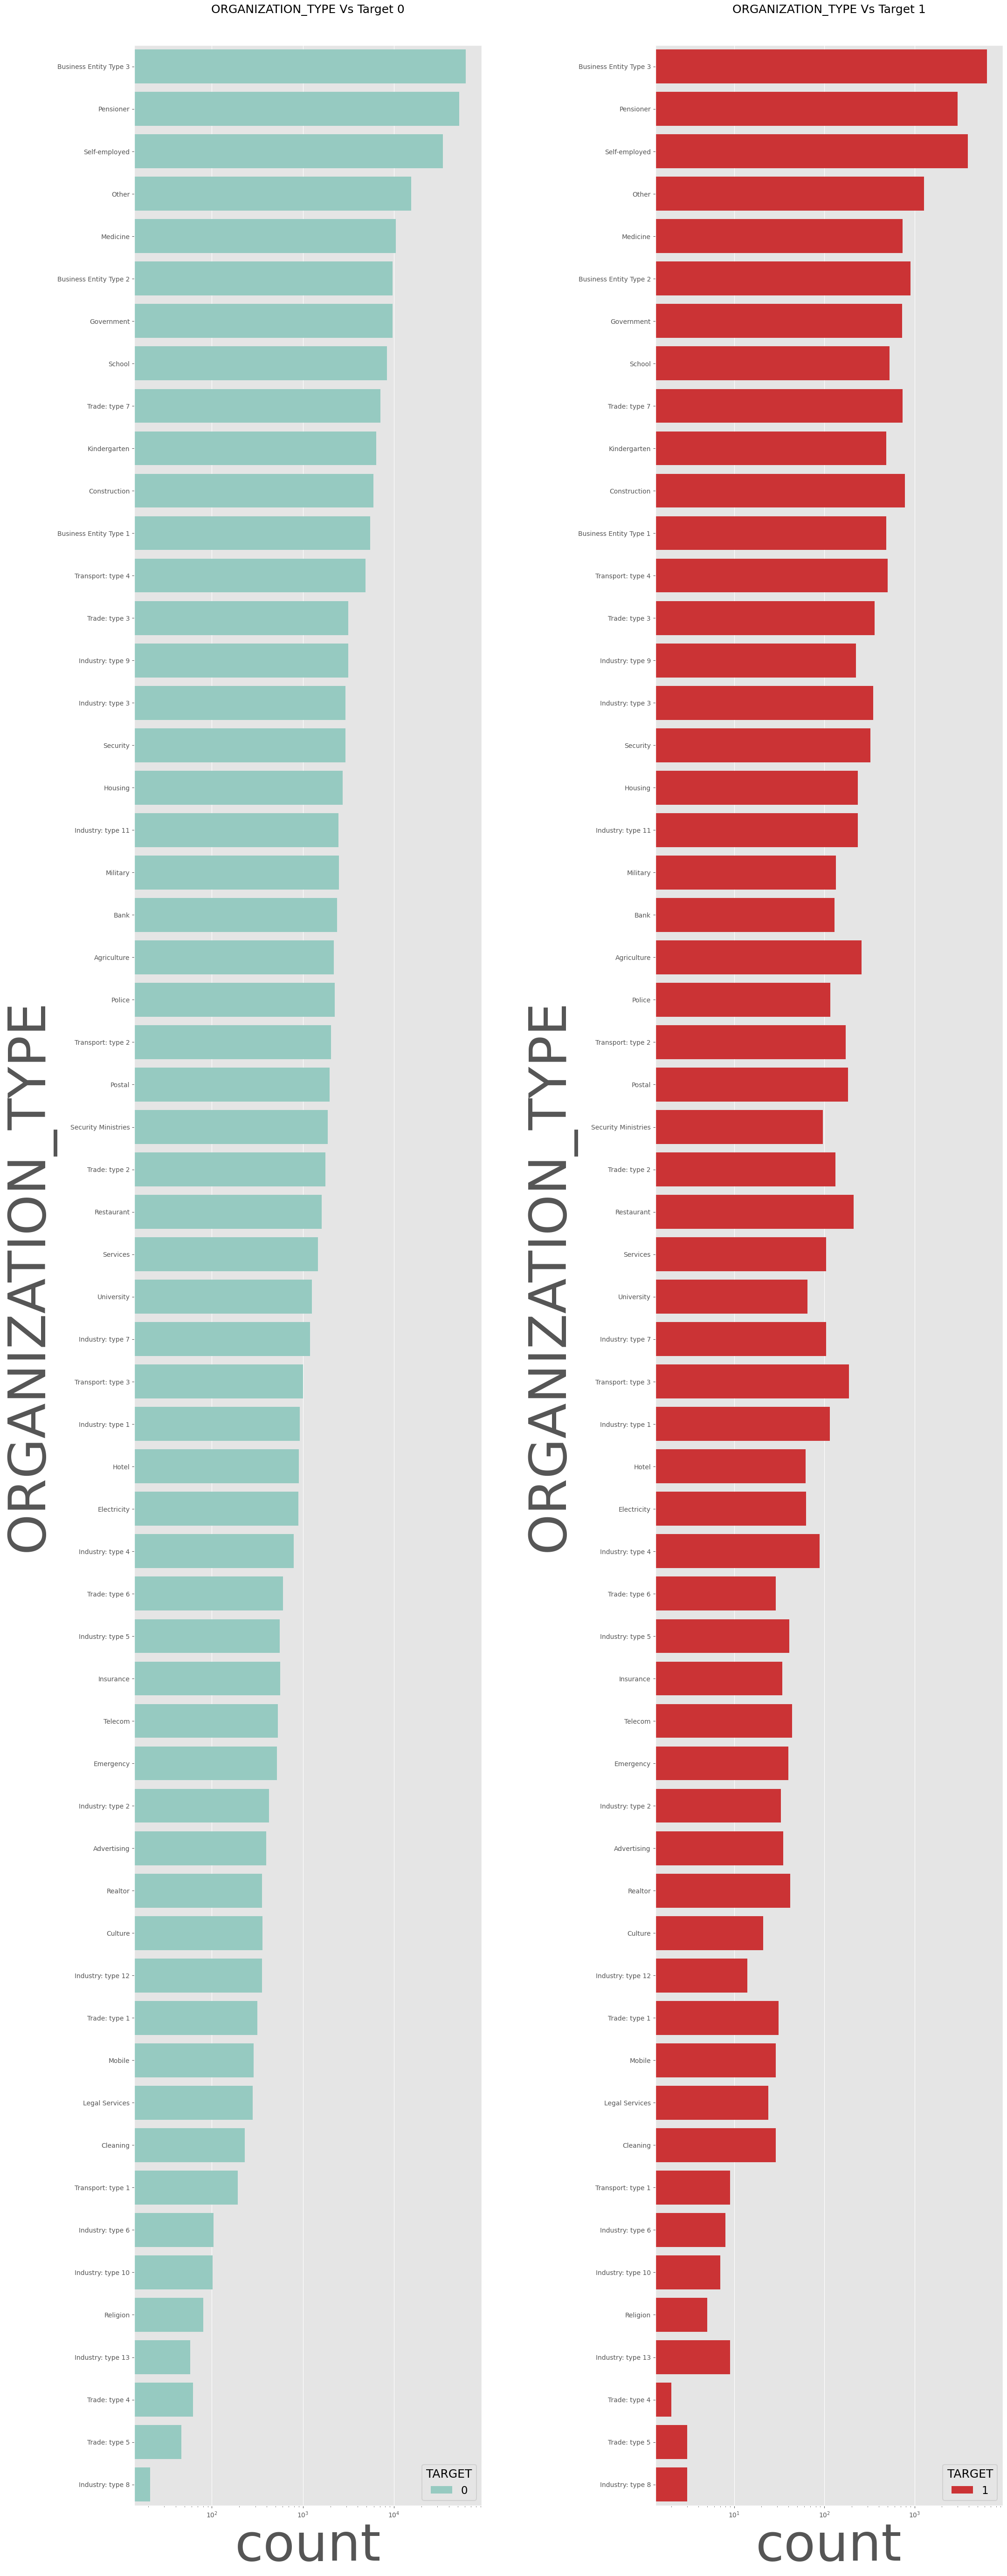

In [ ]:
#ORGANIZATION'S distribution based on Target 0 and Target 1
plt.figure(figsize=(40,5))
plt.rcParams["axes.labelsize"] = 80
plt.rcParams['axes.titlesize'] = 80                                                           # Plot Configuration
plt.rcParams['axes.titlepad'] = 50
fig, axes = plt.subplots(nrows=1,ncols=2)
sns.set_context('talk')
fig.subplots_adjust(left= 0.09,bottom=1,right=3,top= 12,wspace=0.5,hspace=0.3)


plt.subplot(121)
plt.xscale('log')                                                                             # For Target0
sns.countplot(data=Target0,y='ORGANIZATION_TYPE',
              order=df_app['ORGANIZATION_TYPE'].value_counts().index,palette='Set3',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 0")



plt.subplot(122)
plt.xscale('log')                                                                              # For Target1
sns.countplot(data=Target1,y='ORGANIZATION_TYPE',
              order=df_app['ORGANIZATION_TYPE'].value_counts().index,palette='Set1',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 1")



plt.show();

Clients with ORGANIZATION_TYPE Business Entity Type 3, Self-employed, Other ,Medicine, Government,Business Entity Type 2 applied the most for the loan as compared to others

## Cleaning and analysing second dataset

In [ ]:
df_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [ ]:
df_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
#Checking the summary for the numeric columns
df_prev.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115833    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [ ]:
#Sorting Percentage of null values in each column in desending order
(df_prev.isnull().sum()/len(df_prev)*100).sort_values(ascending = False).head(30)


RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
NAME_YIELD_GROUP              0.000000
NAME_PORTFOLIO                0.000000
NAME_SELLER_INDUSTRY          0.000000
SELLERPLACE_AREA              0.000000
CHANNEL_TYPE                  0.000000
NAME_PRODUCT_TYPE             0.000000
SK_ID_PREV                    0.000000
NAME_GOODS_CATEGORY           0.000000
NAME_CLIENT_TYPE              0.000000
CODE_REJECT_REASON       

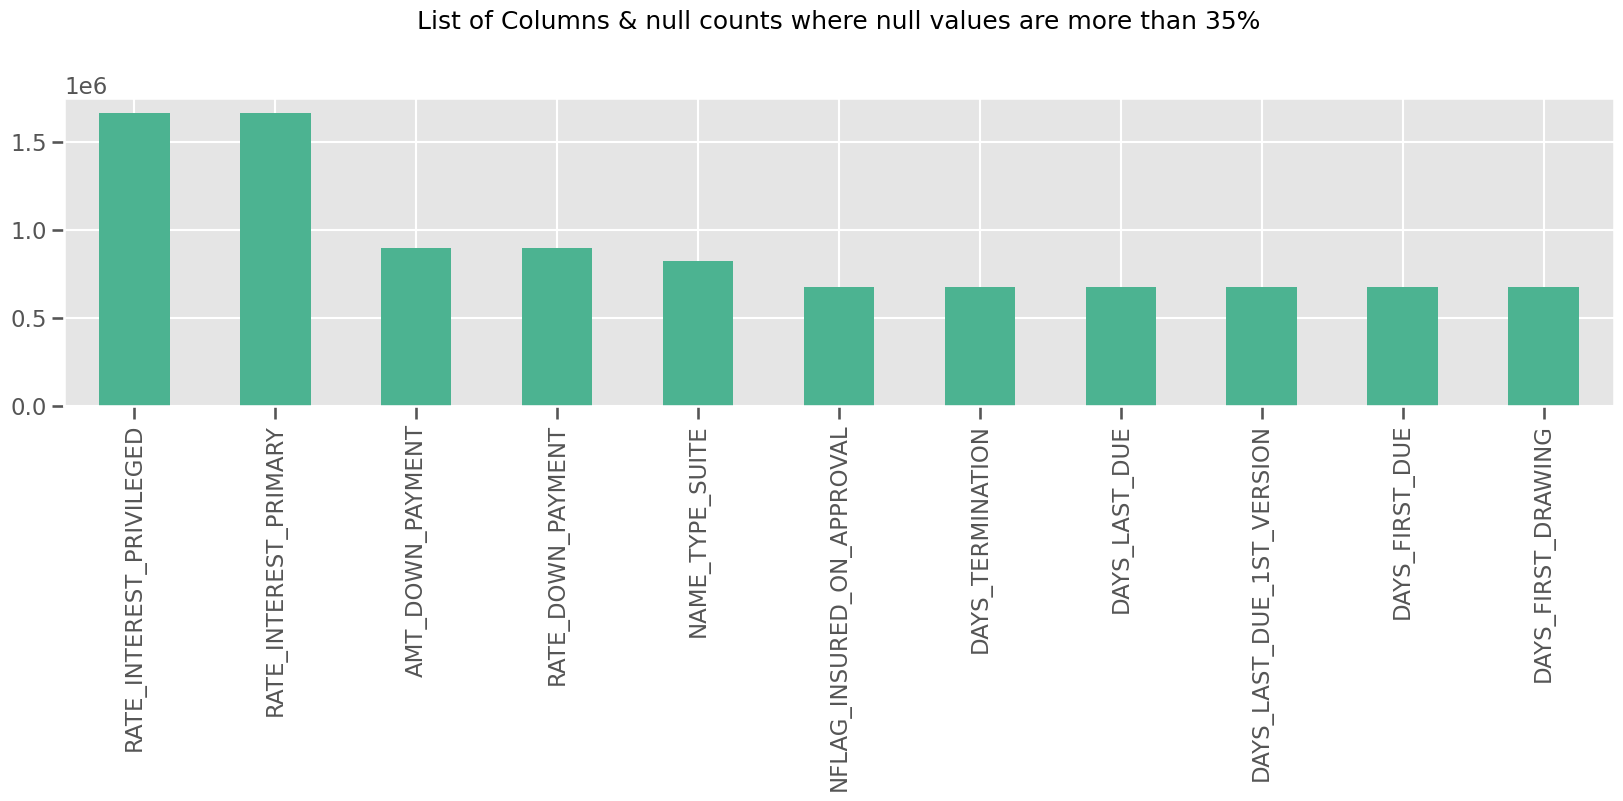

In [ ]:
#List of Columns & null counts where null values are more than 35%
null_col = df_prev.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >(0.35*len(df_prev))]

plt.figure(figsize=(20,4))
null_col.plot(kind='bar', color="#4CB391")
plt.title('List of Columns & null counts where null values are more than 35%')
plt.show()

In [ ]:
len(null_col)

11

In [ ]:
#Removing the columns having percentage of null values > 35%
label = list(null_col.index.values) #Making list of column names having null values greater than 35%
df_prev.drop(labels = label,axis=1,inplace = True) #Droping those columns

In [ ]:
#Shape of new data frame after removing null values
df_prev.shape

(1670214, 26)

In [ ]:
null = (df_prev.isnull().sum()/len(df_prev)*100).sort_values(ascending = False).head(50)
null.head(30)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

In [ ]:
#Removing the null values from AMT_ANNUITY and AMT_GOODS_PRICE
df_prev.AMT_GOODS_PRICE.fillna(df_prev.AMT_GOODS_PRICE.median(),inplace = True)

df_prev.AMT_ANNUITY.fillna(df_prev.AMT_ANNUITY.mode()[0],inplace = True)

df_prev.CNT_PAYMENT.fillna(df_prev.CNT_PAYMENT.mode()[0],inplace = True)

In [ ]:
#Checking if there are still null values or not
(df_prev.isnull().sum()/len(df_prev)*100).sort_values(ascending=False)

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_YIELD_GROUP               0.0
CNT_PAYMENT                    0.0
NAME_SELLER_INDUSTRY           0.0
SELLERPLACE_AREA               0.0
CHANNEL_TYPE                   0.0
NAME_PRODUCT_TYPE              0.0
NAME_PORTFOLIO                 0.0
NAME_GOODS_CATEGORY            0.0
NAME_CLIENT_TYPE               0.0
CODE_REJECT_REASON             0.0
NAME_PAYMENT_TYPE              0.0
DAYS_DECISION                  0.0
NAME_CONTRACT_STATUS           0.0
NAME_CASH_LOAN_PURPOSE         0.0
NFLAG_LAST_APPL_IN_DAY         0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
HOUR_APPR_PROCESS_START        0.0
WEEKDAY_APPR_PROCESS_START     0.0
AMT_GOODS_PRICE                0.0
AMT_CREDIT                     0.0
AMT_APPLICATION                0.0
AMT_ANNUITY                    0.0
NAME_CONTRACT_TYPE             0.0
PRODUCT_COMBINATION            0.0
dtype: float64

In [ ]:
#Removing the column values of 'XNA' and 'XAP'
df_prev=df_prev.drop(df_prev[df_prev['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_prev=df_prev.drop(df_prev[df_prev['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_prev=df_prev.drop(df_prev[df_prev['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df_prev.shape  #Cheking shape after removing

(69635, 26)

Merging two datasets

In [ ]:
df3=pd.merge(left=df_app,right=df_prev,how='inner',on='SK_ID_CURR',suffixes='_x')

In [ ]:
# Renaming the column names after merging
df3 = df3.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [ ]:
df3.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100034       0    Revolving loans           M             0   
1      100035       0         Cash loans           F             0   
2      100039       0         Cash loans           M             1   
3      100046       0    Revolving loans           M             1   
4      100046       0    Revolving loans           M             1   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0           90000.0    180000.0       9000.0   
1                1             0          292500.0    665892.0      24592.5   
2                0             1          360000.0    733315.5      39069.0   
3                1             0          180000.0    540000.0      27000.0   
4                1             0          180000.0    540000.0      27000.0   

   AMT_GOODS_PRICE_ NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          180000.0   Unaccompanied               Working   
1          477000.0   Unaccompanied  Commercial associate   
2          679500.0   Unaccompanied  Commercial associate   
3          540000.0   Unaccompanied               Working   
4          540000.0   Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education  Single / not married       With parents   
1  Secondary / secondary special        Civil marriage  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3               Higher education               Married  House / apartment   
4               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.030755          28           1010             4799.0   
1                    0.025164          41           2668             5266.0   
2                    0.015221          32           2060             3557.0   
3                    0.025164          44           1761             8236.0   
4                    0.025164          44           1761             8236.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             3015        Laborers              1.0   
1             3787       Pensioner              2.0   
2             3557         Drivers              3.0   
3             4292        Managers              2.0   
4             4292        Managers              2.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                    TUESDAY                       16   
1                  WEDNESDAY                       13   
2                   THURSDAY                       10   
3                    TUESDAY                        8   
4                    TUESDAY                        8   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       1   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0  Business Entity Type 3   
2                       1                        0           Self-employed   
3                       0                        0  Business Entity Type 3   
4                     

In [ ]:
df3.shape

(59413, 73)

In [ ]:
df3.isnull().sum()

SK_ID_CURR              0
TARGET                  0
NAME_CONTRACT_TYPE      0
CODE_GENDER             0
FLAG_OWN_CAR            0
                       ..
SELLERPLACE_AREA        0
NAME_SELLER_INDUSTRY    0
CNT_PAYMENT             0
NAME_YIELD_GROUP        0
PRODUCT_COMBINATION     0
Length: 73, dtype: int64

In [ ]:
df3.AMT_GOODS_PRICE_.fillna(df3.EXT_SOURCE_2.median() , inplace = True)

df3.AMT_ANNUITY.fillna(df3.EXT_SOURCE_3.median() , inplace = True)

In [ ]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Percentage of NAME_CLIENT_TYPE","Percentage of NAME_CONTRACT_STATUS"),
                   specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels = df3['NAME_CLIENT_TYPE'].value_counts().index.to_list(),
                     values = df3['NAME_CLIENT_TYPE'].value_counts().to_list() ,textinfo='label+percent'),1, 1)

fig.add_trace(go.Pie(labels = df3['NAME_CONTRACT_STATUS'].value_counts().index.to_list(),
                     values = df3['NAME_CONTRACT_STATUS'].value_counts().to_list(), textinfo='label+percent'),1, 2)


fig.update_traces(hole=.4,showlegend=False)      # Use `hole` to create a donut-like pie chart

fig.show()

From the above plotted figure, we can understand that, in case of NAME_CLIENT_TYPE, there are 80.7%of clients who are repeaters, 14.5% new clients for loan and for the NAME_CONTRACT_STATUS, 38.8% of client's loans were approved and 58.5% client's loans were refused and 0.308% of the loans were cancelled.

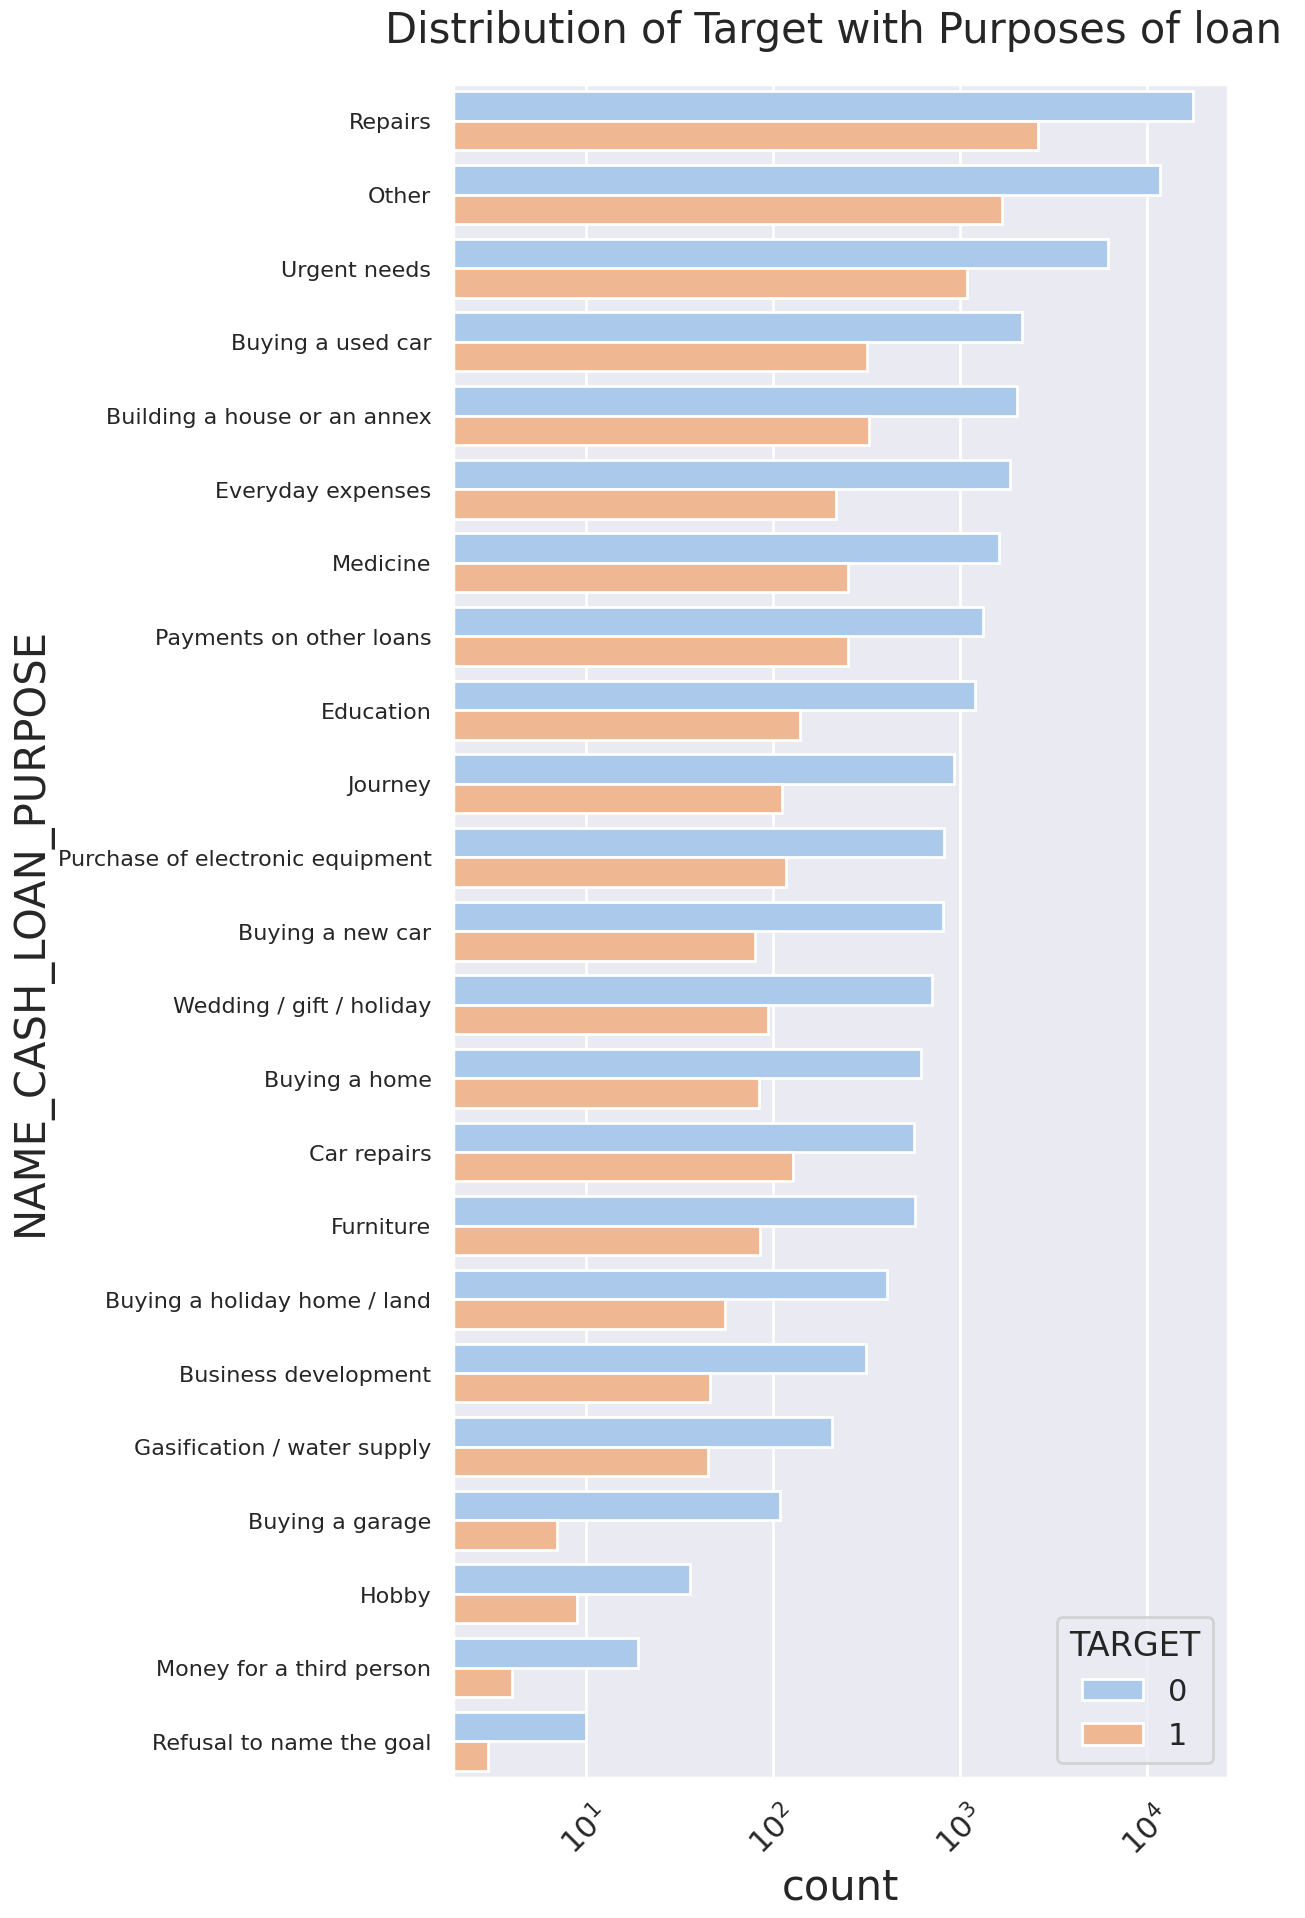

In [ ]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.figure(figsize=(10,22))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=45)
plt.yticks(fontsize=16)
plt.xscale('log')
plt.title('Distribution of Target with Purposes of loan ')

ax = sns.countplot(data = df3, y= 'NAME_CASH_LOAN_PURPOSE',
                   order=df3['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='pastel')

As seen from the above visualisation, most of the loans came from the purpose repairs, for education and medicine purpose there were equal number of rejection and approvals and for the paying other loans and buying a new car have the maximum number of rejections.

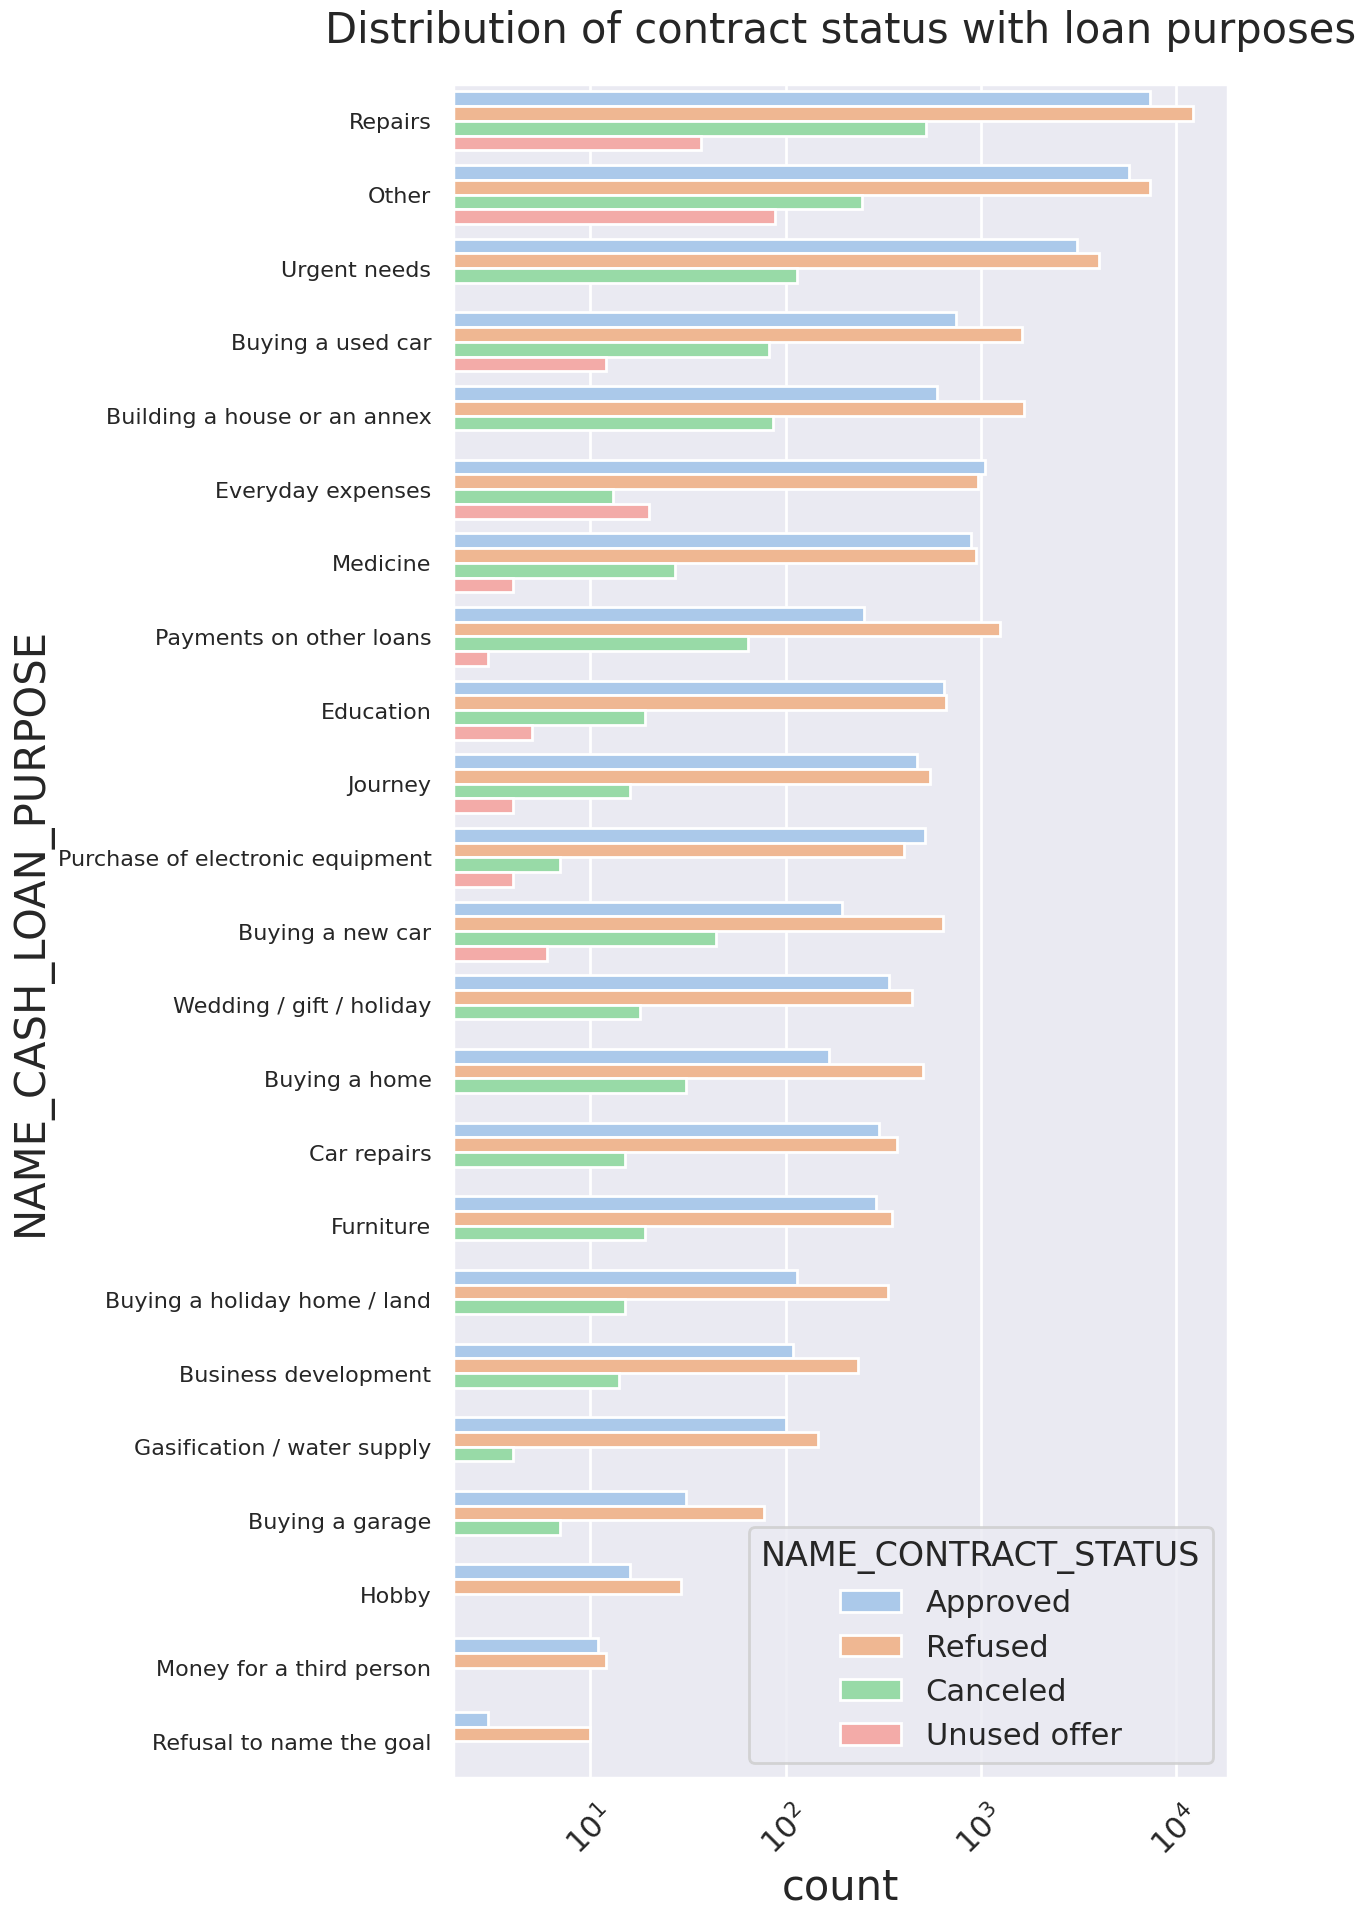

In [ ]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.figure(figsize=(10,22))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=45)
plt.yticks(fontsize=16)
plt.xscale('log')
plt.title('Distribution of contract status with loan purposes')



ax = sns.countplot(data = df3, y= 'NAME_CASH_LOAN_PURPOSE',
                   order=df3['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='pastel')

In [ ]:
plt.figure(figsize=(120,120))
plt.show(sns.heatmap(df3.corr(), cmap='RdYlGn', annot=True))

Model Creation

In [ ]:
corr_matrix = df3.corr()
print(corr_matrix["TARGET"].sort_values(ascending=False))

TARGET                          1.000000
DAYS_DECISION                   0.062798
REG_CITY_NOT_WORK_CITY          0.055660
LIVE_CITY_NOT_WORK_CITY         0.041623
REG_CITY_NOT_LIVE_CITY          0.039054
CNT_PAYMENT                     0.030572
CNT_CHILDREN                    0.026986
OBS_30_CNT_SOCIAL_CIRCLE        0.026563
OBS_60_CNT_SOCIAL_CIRCLE        0.026209
CNT_FAM_MEMBERS                 0.025199
DEF_30_CNT_SOCIAL_CIRCLE        0.024675
DEF_60_CNT_SOCIAL_CIRCLE        0.021117
SELLERPLACE_AREA                0.020981
LIVE_REGION_NOT_WORK_REGION     0.006229
REG_REGION_NOT_WORK_REGION      0.005917
AMT_REQ_CREDIT_BUREAU_QRT       0.005153
AMT_REQ_CREDIT_BUREAU_DAY       0.004066
AMT_REQ_CREDIT_BUREAU_HOUR      0.000175
NFLAG_LAST_APPL_IN_DAY         -0.000161
AMT_REQ_CREDIT_BUREAU_WEEK     -0.003909
AMT_ANNUITY                    -0.003963
SK_ID_PREV                     -0.004207
REG_REGION_NOT_LIVE_REGION     -0.004221
SK_ID_CURR                     -0.004885
FLAG_OWN_REALTY 

Problem Statement 1: Loan Preferences: Segment customers based on their loan preferences, considering factors like loan amount, term, type, and interest rates. Repayment History: Further segment these groups based on their repayment history, such as timely payments, late payments, or defaults.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

features = ['AMT_CREDIT', 'AMT_ANNUITY', 'CNT_PAYMENT', 'DAYS_DECISION', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
X = df3[features]
y = df3['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10358
           1       0.94      0.45      0.61      1525

    accuracy                           0.93     11883
   macro avg       0.93      0.72      0.78     11883
weighted avg       0.93      0.93      0.91     11883



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score


model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'Test ROC-AUC score: {roc_auc}')

Accuracy: 0.8709080198603046
Test ROC-AUC score: 0.5043187019457519


Conclusion for Problem Statement 1: From the above 2 models, we can conclude that Random Forest has higher accuracy than Gradient Descent proving it to be the better model.

Problem Statement 2: Risk Assessment: Evaluate and quantify the risk associated with each loan applicant using the model. Approval Strategy Development: Develop strategies to balance risk minimization with approving a high number of safe loans.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

features = ["DAYS_DECISION", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "REG_CITY_NOT_LIVE_CITY",
"CNT_PAYMENT", "CNT_CHILDREN", "OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "CNT_FAM_MEMBERS",
"DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "SELLERPLACE_AREA", "AMT_REQ_CREDIT_BUREAU_YEAR",
"AMT_CREDIT_PREV", "AMT_INCOME_TOTAL", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_CREDIT", "AMT_APPLICATION",
"AMT_GOODS_PRICEx", "HOUR_APPR_PROCESS_START_PREV", "HOUR_APPR_PROCESS_START", "AMT_GOODS_PRICE_",
"AMT_ANNUITY_PREV", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "REGION_POPULATION_RELATIVE",
"DAYS_BIRTH", "DAYS_LAST_PHONE_CHANGE", "EXT_SOURCE_2", "EXT_SOURCE_3"]

X = df3[features]
y = df3['TARGET']
model = RandomForestClassifier(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
print(f'Test ROC-AUC score: {roc_auc}')
risk_threshold = 0.5
approved_loans = X_test[y_pred <= risk_threshold]

Test ROC-AUC score: 0.907988503382196


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE score: {rmse}')

Test RMSE score: 0.24539309951498908


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

features = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_BIRTH', 'REGION_POPULATION_RELATIVE']
X = df3[features]
y = df3['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10358
           1       0.40      0.01      0.02      1525

    accuracy                           0.87     11883
   macro avg       0.63      0.50      0.48     11883
weighted avg       0.81      0.87      0.81     11883



Conclusion for Problem Statement 2: From the above 2 models, we can conclude that Random Forest has higher accuracy than Logistic Regression proving it to be the better model.